In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['GlobalLandTemperaturesByCity.csv', 'GlobalTemperatures.csv', 'GlobalLandTemperaturesByCountry.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalLandTemperaturesByMajorCity.csv']


In [6]:
df = pd.read_csv('../input/GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df[['dt', 'LandAverageTemperature']]

df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].map(lambda x: x.year)
df['month'] = df['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = df['year'].min()
max_year = df['year'].max()
years = range(min_year, max_year + 1)

df['season'] = df['month'].apply(get_season)

winter_temps = []
summer_temps = []
spring_temps = []
autumn_temps = []

for year in years:
    curr_years_data = df[df['year'] == year]
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())


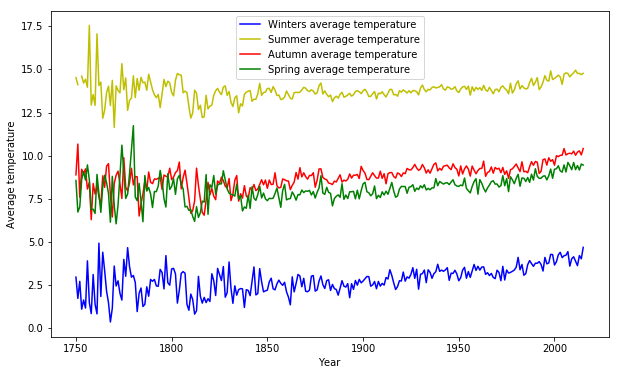

In [8]:
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, winter_temps, label='Winters average temperature', color='b')
plt.plot(years, summer_temps, label='Summer average temperature', color='y')
plt.plot(years, autumn_temps, label='Autumn average temperature', color='r')
plt.plot(years, spring_temps, label='Spring average temperature', color='g')
ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
plt.legend()
plt.show()